# Trainee IEEE - segundo período

## Importação de bibliotecas e de Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [2]:
dataset_original = pd.read_csv(r'C:\Users\rapha\OneDrive\Documentos\Programação + Cursos\IEEE\winequality.csv', index_col = 0)

## Análise exploratória

In [3]:
dataset_original.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_is_red
0,5.9,0.61,0.08,2.1,0.071,16.0,24.0,0.99376,3.56,0.77,11.1,6,1
1,8.2,1.00,0.09,2.3,0.065,7.0,37.0,0.99685,3.32,0.55,9.0,6,1
2,6.4,0.24,0.49,5.8,0.053,25.0,120.0,0.99420,3.01,0.98,10.5,6,0
3,6.6,0.23,0.26,1.3,0.045,16.0,128.0,0.99340,3.36,0.60,10.0,6,0
4,7.2,0.24,0.29,3.0,0.036,17.0,117.0,0.99411,3.36,0.68,10.1,6,0


In [4]:
# Quantidade de linhas e colunas no dataset
dataset_original.shape

(6497, 13)

In [5]:
# Infomações gerais no dataset
dataset_original.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_is_red
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [6]:
# Verificação do n° de registros em cada coluna e o tipo dos dados
dataset_original.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  wine_is_red           6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


In [7]:
# Verificação de registros nulos
dataset_original.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
wine_is_red             0
dtype: int64

Todo o dataset está com o tipo de dados correto e com todos os valores preenchidos

<Axes: xlabel='quality'>

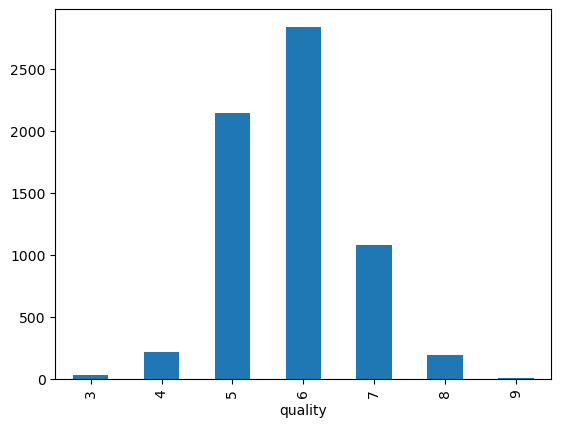

In [8]:
# Verificação da quantia [quality] do dataset 
dataset_original.groupby(['quality'])['quality'].count().plot(kind = 'bar')

<Axes: xlabel='wine_is_red'>

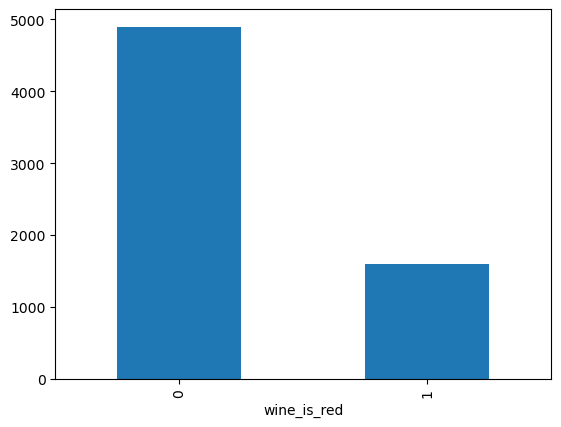

In [9]:
# Verificação da quantia [wine_is_red] do dataset 
dataset_original.groupby(['wine_is_red'])['wine_is_red'].count().plot(kind = 'bar')

## KNN com apenas Numpy

In [10]:
# Conversão do Dataset para formato array
NP_data = dataset_original.to_numpy()

In [11]:
# Definição do KNN utilizando apenas numpy
class KNearestNeighbors():
    def __init__(self, X_train, y_train, n_neighbors=5, weights='uniform'):

        self.X_train = X_train
        self.y_train = y_train

        self.n_neighbors = n_neighbors
        self.weights = weights

        self.n_classes = 3

# Calcula distância euclidiana
    def euclidian_distance(self, a, b):
        return np.sqrt(np.sum((a - b)**2, axis=1))

# 1. Calcula a distância de cada um dos pontos em relação aos outros, 
# fazendo o registro dessas distâncias em uma tabela (point_dist)
# 2. Enumera as linhas (enum_neigh) e ordena elas pelas N distâncias mais próximas (sorted_neigh)
# 3. Extrai os índices e as distâncias e as retorna
    def kneighbors(self, X_test, return_distance=False):

        dist = []
        neigh_ind = []

        point_dist = [self.euclidian_distance(x_test, self.X_train) for x_test in X_test]

        for row in point_dist:
            enum_neigh = enumerate(row)
            sorted_neigh = sorted(enum_neigh,
                                  key=lambda x: x[1])[:self.n_neighbors]

            ind_list = [tup[0] for tup in sorted_neigh]
            dist_list = [tup[1] for tup in sorted_neigh]

            dist.append(dist_list)
            neigh_ind.append(ind_list)

        if return_distance:
            return np.array(dist), np.array(neigh_ind)

        return np.array(neigh_ind)

# 1. Tendo como base os pontos mais próximos separados pela função "kneighbors", realiza a previsão de classificação do ponto.
# 2. O critério de classificação pode ser uniforme em que ocorre uma votação com pesos iguais ou 
# 'distance' que apresenta peso na votação conforme a distância do ponto aos mais próximos, quanto mais próximo maior o peso.
    def predict(self, X_test):

        if self.weights == 'uniform':
            neighbors = self.kneighbors(X_test)
            y_pred = np.array([
                np.argmax(np.bincount(self.y_train[neighbor]))
                for neighbor in neighbors
            ])

            return y_pred

        if self.weights == 'distance':

            dist, neigh_ind = self.kneighbors(X_test, return_distance=True)

            inv_dist = 1 / dist

            mean_inv_dist = inv_dist / np.sum(inv_dist, axis=1)[:, np.newaxis]

            proba = []

            for i, row in enumerate(mean_inv_dist):

                row_pred = self.y_train[neigh_ind[i]]

                for k in range(self.n_classes):
                    indices = np.where(row_pred == k)
                    prob_ind = np.sum(row[indices])
                    proba.append(np.array(prob_ind))

            predict_proba = np.array(proba).reshape(X_test.shape[0],
                                                    self.n_classes)

            y_pred = np.array([np.argmax(item) for item in predict_proba])

            return y_pred

# Calculo de acerto de classificação com base no modelo
    def score(self, X_test, y_test):
        y_pred = self.predict(X_test)

        return float(sum(y_pred == y_test)) / float(len(y_test))

### Aplicação do modelo sem normalizar

In [12]:
# Divisão dos dados entre teste e treino para o modelo
# Classificação da qualidade do vinho
split_rate = 0.75
np.random.shuffle(NP_data)
train, test = np.split(NP_data, [int(split_rate*(NP_data.shape[0]))])

X_train = np.delete(train, 11, 1)
y_train = train[:, 11]

X_test = np.delete(test, 11, 1)
y_test = test[:, 11]

y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [13]:
# Aplicação do modelo de classificação multiclasse KNN da qualidade do vinho
numpyKNN_quality = KNearestNeighbors(X_train, y_train, n_neighbors=5)
skKNN_quality = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)

# Verificação de precisão do modelo
numpy_KNN_score_quality = numpyKNN_quality.score(X_test, y_test) *100
sk_KNN_score_quality = skKNN_quality = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train).score(X_test, y_test) *100

print (f'A porcentagem de acerto do modelo de classificação multiclasse KNN numpy da qualidade do vinho é de {numpy_KNN_score_quality} %')
print (f'A porcentagem de acerto do modelo de classificação multiclasse KNN SkLearn da qualidade do vinho é de {sk_KNN_score_quality} %')

A porcentagem de acerto do modelo de classificação multiclasse KNN numpy da qualidade do vinho é de 49.47692307692308 %
A porcentagem de acerto do modelo de classificação multiclasse KNN SkLearn da qualidade do vinho é de 49.47692307692308 %


In [14]:
# Divisão dos dados entre teste e treino para o modelo
# Classificação se o vinho é tinho ou não
split_rate = 0.75
np.random.shuffle(NP_data)
train, test = np.split(NP_data, [int(split_rate*(NP_data.shape[0]))])

X_train = train[:, 0:12]
y_train = train[:, 12]

X_test = train[:, 0:12]
y_test = train[:, 12]

y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [15]:
# Aplicação do modelo de classificação binária KNN se o vinho é tinto ou não
numpyKNN_red = KNearestNeighbors(X_train, y_train, n_neighbors=5)
skKNN_red = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)

numpy_KNN_score_red = numpyKNN_red.score(X_test, y_test) *100
sk_KNN_score_red = skKNN_red.score(X_test, y_test) *100
print (f'A porcentagem de acerto do modelo de classificação binária KNN numpy se o vinho é tinto ou não é de {numpy_KNN_score_red} %')
print (f'A porcentagem de acerto do modelo de classificação binária KNN SkLearn se o vinho é tinto ou não é de {sk_KNN_score_red} %')

A porcentagem de acerto do modelo de classificação binária KNN numpy se o vinho é tinto ou não é de 96.03858784893268 %
A porcentagem de acerto do modelo de classificação binária KNN SkLearn se o vinho é tinto ou não é de 96.03858784893268 %


### Aplicação do modelo com os dados normalizados

In [16]:
# Separando os dados de input
Xq = np.delete(NP_data, 11, 1)
yq = NP_data[:, 11]

#Normalizando os dados
mu = np.mean(Xq, 0)
sigma = np.std(Xq, 0)
Xq = (Xq - mu ) / sigma

In [17]:
# Reagrupando X e y
Norm_dataQ = np.hstack((Xq, yq[:, np.newaxis]))

# Embaralhando o dataset
np.random.shuffle(Norm_dataQ)

#Determinando proporção de divisão do dataset
split_rate = 0.75

# Separando a base de dados entre teste e treino
trainQ, testQ = np.split(Norm_dataQ, [int(split_rate*(Norm_dataQ.shape[0]))])

# Separando os dados de supervisão e input
X_trainQ = trainQ[:,:-1]
y_trainQ = trainQ[:, -1]

X_testQ = testQ[:,:-1]
y_testQ = testQ[:, -1]

y_trainQ = y_trainQ.astype(int)
y_testQ = y_testQ.astype(int)

In [18]:
# Aplicação do modelo de classificação multiclasse KNN da qualidade do vinho, com dados normalizados.
normKNN = KNearestNeighbors(X_trainQ, y_trainQ, n_neighbors=5)
numpy_norm_KNN_score_quality = normKNN.score(X_testQ, y_testQ) *100
print (f'A porcentagem de acerto do modelo de classificação multiclasse KNN Numpy da qualidade do vinho é de {numpy_norm_KNN_score_quality} %, com dados normalizados')

A porcentagem de acerto do modelo de classificação multiclasse KNN Numpy da qualidade do vinho é de 54.400000000000006 %, com dados normalizados


In [19]:
# Separando os dados de input
Xr = NP_data[:, 0:12]
yr = NP_data[:, 12]

#Normalizando os dados
mu = np.mean(Xr, 0)
sigma = np.std(Xr, 0)
Xr = (Xr - mu ) / sigma

In [20]:
# Reagrupando X e y
Norm_dataR = np.hstack((Xr, yr[:, np.newaxis]))

# Embaralhando o dataset
np.random.shuffle(Norm_dataR)

#Determinando proporção de divisão do dataset
split_rate = 0.75

# Separando a base de dados entre teste e treino
trainR, testR = np.split(Norm_dataR, [int(split_rate*(Norm_dataR.shape[0]))])

# Separando os dados de supervisão e input
X_trainR = trainR[:,:-1]
y_trainR = trainR[:, -1]

X_testR = testR[:,:-1]
y_testR = testR[:, -1]

y_trainR = y_trainR.astype(int)
y_testR = y_testR.astype(int)

In [21]:
# Aplicação do modelo de classificação binária KNN se o vinho é tinto ou não, com dados normalizados.
numpyKNN = KNearestNeighbors(X_trainR, y_trainR, n_neighbors=5)
numpy_norm_KNN_score_red = numpyKNN.score(X_testR, y_testR) *100
print (f'A porcentagem de acerto do modelo de classificação binária KNN se o vinho é tinto ou não é de {numpy_norm_KNN_score_red} %, com dados normalizados.')

A porcentagem de acerto do modelo de classificação binária KNN se o vinho é tinto ou não é de 99.2 %, com dados normalizados.


### Resumo dos resultados de KNN

In [22]:
scores = [[numpy_KNN_score_quality, sk_KNN_score_quality],
           [numpy_KNN_score_red, sk_KNN_score_red], [numpy_norm_KNN_score_quality, '-'], [numpy_norm_KNN_score_red, '-']]

In [23]:
scores_table = pd.DataFrame(scores, columns = ['Numpy KNN accuracy', 'Sklearn KNN accuracy'], 
                            index = ['Quality not normalized', 'Red not normalized','Quality normalized','Red normalized'])
scores_table

,Numpy KNN accuracy,Sklearn KNN accuracy
Quality not normalized,49.476923,49.476923
Red not normalized,96.038588,96.038588
Quality normalized,54.400000,-
Red normalized,99.200000,-


Podemos concluir que a acurácia do modelo KNN utilizando apenas numpy ou a biblioteca Scikit é a mesma

## Aplicação de Random Forest

In [24]:
# Importação da bilbioteca
from sklearn.ensemble import RandomForestRegressor

#Definição de parâmetros - 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 12)

### Prevendo qualidade do vinho com Random Forest

In [25]:
# Treinando o modelo utilizando os dados já normalizados anteriormente
rf.fit(X_trainR, y_trainR)

# Aplicando o modelo aos dados de teste
rf_predict = rf.predict(X_testQ)

In [26]:
# Calculo do erro absoluto
errors = abs(rf_predict - y_testQ)

print('Erro médio absoluto:', round(np.mean(errors), 2))

Erro médio absoluto: 5.59


Com n_estimators = 10.000, erro médio de 5.57

In [27]:
# Média de quality
dataset_original['quality'].mean()

5.818377712790519

In [28]:
# Faixa de erro máxima levando em consideração a moda
baseline_moda = abs(6 - y_trainR)

# Faixa de erro máxima levando em consideração a média de valores
baseline_media = abs(dataset_original['quality'].mean() - y_trainR)

print('Faixa de erro máxima com moda', round(np.mean(baseline_moda), 2))
print('Faixa de erro máxima com média', round(np.mean(baseline_media), 2))

Faixa de erro máxima com moda 5.75
Faixa de erro máxima com média 5.57


Ao observar os resultados acima, quase não há diferença entre "chutar" a média ou a moda para todos os resultados e aplicar um modelo de Random Forest para o problema em questão.

## Undersampling

 Método que diminui a quantidade de observações com maior número de classificação, afim de equalizar.

In [29]:
df = pd.DataFrame(Norm_dataR, columns = dataset_original.columns)

In [30]:
dataset_original.groupby(['wine_is_red'])['wine_is_red'].count()

wine_is_red
0    4898
1    1599
Name: wine_is_red, dtype: int64

<Axes: xlabel='wine_is_red'>

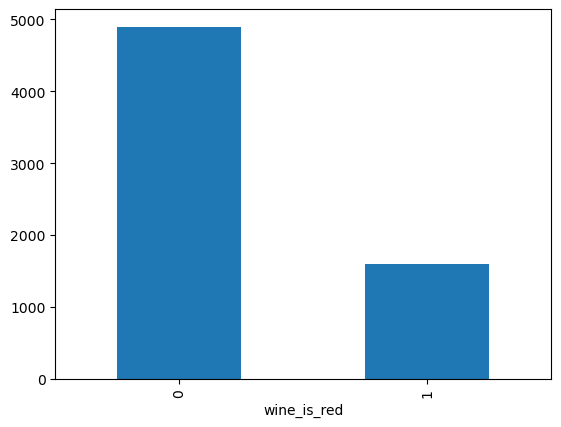

In [31]:
# Verificação da quantia [wine_is_red] do dataset 
dataset_original.groupby(['wine_is_red'])['wine_is_red'].count().plot(kind = 'bar')

Random under-sampling:
0.0    1599
1.0    1599
Name: wine_is_red, dtype: int64


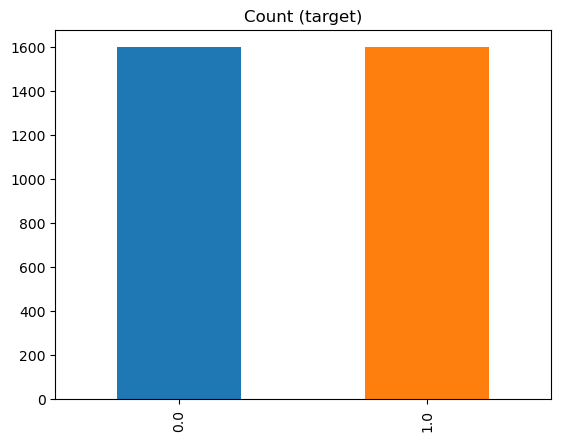

In [32]:
# Contar as classes
count_class_0, count_class_1 = df['wine_is_red'].value_counts()

# Divide by class
df_class_0 = df[df['wine_is_red'] == 0]
df_class_1 = df[df['wine_is_red'] == 1]

df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under['wine_is_red'].value_counts())
df_test_under['wine_is_red'].value_counts().plot(kind='bar', title='Count (Undersampled)',color = ['#1F77B4', '#FF7F0E']);

In [33]:
np_test_under = df_test_under.to_numpy()

In [34]:
# Embaralhando o dataset
np.random.shuffle(np_test_under)

#Determinando proporção de divisão do dataset
split_rate = 0.75

# Separando a base de dados entre teste e treino
trainU, testU = np.split(np_test_under, [int(split_rate*(np_test_under.shape[0]))])

# Separando os dados de supervisão e input
X_trainU = trainU[:,:-1]
y_trainU = trainU[:, -1]

X_testU = testU[:,:-1]
y_testU = testU[:, -1]

y_trainU = y_trainU.astype(int)
y_testU = y_testU.astype(int)

In [35]:
# Aplicação do modelo de classificação binária KNN se o vinho é tinto ou não, com dados normalizados e aplicando undersampling
underKNN = KNearestNeighbors(X_trainU, y_trainU, n_neighbors=5)
under_norm_KNN_score_red = underKNN.score(X_testU, y_testU) *100
print (f'A porcentagem de acerto do modelo de classificação binária KNN se o vinho é tinto ou não é de {under_norm_KNN_score_red} %, com dados normalizados e aplicando undersampling.')

A porcentagem de acerto do modelo de classificação binária KNN se o vinho é tinto ou não é de 99.625 %, com dados normalizados e aplicando undersampling.


## Oversampling

In [36]:
# Importação de bibliotecas que serão utilizadas
from imblearn.over_sampling import RandomOverSampler

In [37]:
# Separação entre dados de input e supervisão
X_over = df.drop('wine_is_red', axis = 1)
y_over = df['wine_is_red']

In [38]:
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_over, y_over)

from collections import Counter
print(sorted(Counter(y_resampled).items()))

[(0.0, 4898), (1.0, 4898)]


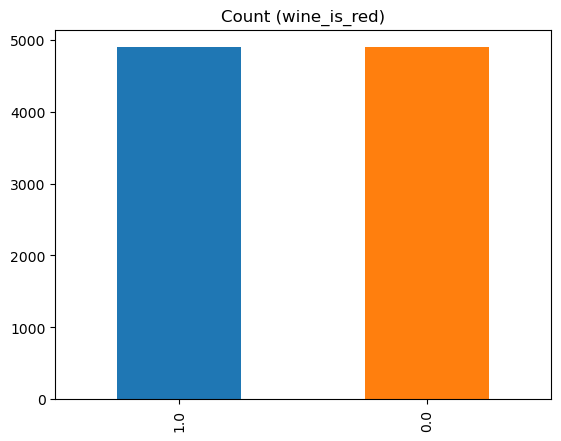

In [44]:
y_resampled.value_counts().plot(kind='bar', title='Count (Overmsampled)',color = ['#1F77B4', '#FF7F0E']);

In [39]:
# Separando a base de dados entre teste e treino
X_trainO, X_testO, y_trainO, y_testO = train_test_split(X_resampled, y_resampled, test_size=0.25)

In [40]:
# Treino do modelo de KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_trainO, y_trainO)

KNeighborsClassifier()

In [41]:
# Verificando acurácia do modelo de classificação binária KNN se o vinho é tinto ou não, com dados normalizados e aplicando undersampling
y_pred = knn.predict(X_testO)
over_norm_KNN_score_red = accuracy_score(y_testO, y_pred) * 100
print (f'A porcentagem de acerto do modelo de classificação binária KNN se o vinho é tinto ou não é de {over_norm_KNN_score_red} %, com dados normalizados e aplicando oversampling.')

A porcentagem de acerto do modelo de classificação binária KNN se o vinho é tinto ou não é de 99.02000816659861 %, com dados normalizados e aplicando oversampling.


## Resumo

In [42]:
resumo = [[numpy_KNN_score_quality],
          [numpy_norm_KNN_score_quality],
          [numpy_KNN_score_red],
          [numpy_norm_KNN_score_red], [under_norm_KNN_score_red], [over_norm_KNN_score_red ]]

In [43]:
resumo_table = pd.DataFrame(resumo, columns = ['KNN accuracy'], 
                            index = ['Quality not normalized', 'Quality normalized', 'Red not normalized','Red normalized',
                                    'Red norm & undersampling', 'Red norm & oversampling'])
resumo_table

,KNN accuracy
Quality not normalized,49.476923
Quality normalized,54.400000
Red not normalized,96.038588
Red normalized,99.200000
Red norm & undersampling,99.625000
Red norm & oversampling,99.020008


O modelo com maior acurácia para verificação se o vinho é tinto ou não foi normalizando e aplicando oversampling, enquanto para prever a qualidade do vinho normalizar o dataset aumentou a taxa de acurácia.

Já para o modelo de Random Forest aplicado a previsão da qualidade do vinho:

Faixa de erro máxima "chutando" os resultados com a moda: 5.75
Faixa de erro máxima "chutando" os resultados com a média: 5.57
Faixa de erro máxima por meio do modelo de Random Forest: 5.57 

Portant, não há diferença entre "chutar" a média para todos os resultados e aplicar um modelo de Random Forest para o problema em questão.